In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
from tqdm.auto import tqdm

In [3]:
import kaggle

OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/

In [4]:
!mkdir -p /root/.config/kaggle

In [5]:
!mv kaggle.json /root/.config/kaggle

In [6]:
! kaggle competitions download -c dogs-vs-cats

 98% 793M/812M [00:03<00:00, 247MB/s]
100% 812M/812M [00:03<00:00, 270MB/s]


In [7]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [8]:
!rm  test1.zip sampleSubmission.csv

In [9]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [10]:
!mkdir image
!mkdir image/dog
!mkdir image/cat

In [11]:
import shutil

In [12]:
source="train/"
dest_dog="image/dog"
dest_cat="image/cat"

for i in os.listdir(source):
  if i.startswith("cat"):
    shutil.copy(source+i,dest_cat)
  elif i.startswith("dog"):
    shutil.copy(source+i,dest_dog)


In [13]:
len(os.listdir(dest_dog)),len(os.listdir(dest_cat))

(12500, 12500)

In [14]:
#idg
batch_size=64
idg = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0,
                                                      horizontal_flip=True,
                                                      rotation_range=30,
                                                      validation_split=0.1)



In [15]:
train_idg=idg.flow_from_directory("image",target_size=(150,150),
                                  batch_size=batch_size,
                                  subset="training")

val_idg=idg.flow_from_directory("image",target_size=(150,150),
                                batch_size=batch_size,
                                subset="validation")

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [16]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Input((150,150,3),name="Input layer"))
model.add(tf.keras.layers.Conv2D(filters=16,
                                 kernel_size=(3,3),
                                 padding="valid",
                                 strides=(1,1),
                                 activation="relu",
                                 name="conv1"))  # 150-3+1/1=148

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),
                                    strides=(2,2),
                                    padding="valid",
                                    name="pool1")) # 148-2-2/2=74

model.add(tf.keras.layers.Conv2D(filters=32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="valid",
                                 activation="relu",
                                  name="conv2"))   # 74-3+1/1=72

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),
                                    strides=(2,2),
                                    padding="valid",
                                    name="pool2")) # 72-2+2//2=36

model.add(tf.keras.layers.Conv2D(filters=32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="valid",
                                 activation="relu",
                                 name="conv3"))   # 36-3+1/1=34

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),
                                    strides=(1,1),
                                    padding="valid",
                                    name="pool3"))    # 34-2-2/2=17


model.add(tf.keras.layers.Flatten(name="flat"))
model.add(tf.keras.layers.Dense(128,activation="relu",name="HL1"))
model.add(tf.keras.layers.Dense(2,activation="softmax", name="Output"))


In [17]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["acc"])

In [18]:
model.fit(train_idg,batch_size=batch_size,epochs=15,validation_data=val_idg)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


352/352 ━━━━━━━━━━━━━━━━━━━━ 176s 474ms/step - acc: 0.5398 - loss: 0.6882 - val_acc: 0.6060 - val_loss: 0.6670
Epoch 2/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 162s 452ms/step - acc: 0.6065 - loss: 0.6638 - val_acc: 0.5300 - val_loss: 0.7016
Epoch 3/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 157s 440ms/step - acc: 0.6417 - loss: 0.6307 - val_acc: 0.6964 - val_loss: 0.5839
Epoch 4/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 160s 442ms/step - acc: 0.6893 - loss: 0.5882 - val_acc: 0.6824 - val_loss: 0.5882
Epoch 5/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 205s 457ms/step - acc: 0.7073 - loss: 0.5664 - val_acc: 0.7284 - val_loss: 0.5405
Epoch 6/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 194s 433ms/step - acc: 0.7235 - loss: 0.5438 - val_acc: 0.7420 - val_loss: 0.5213
Epoch 7/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 165s 461ms/step - acc: 0.7439 - loss: 0.5264 - val_acc: 0.7324 - val_loss: 0.5324
Epoch 8/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 199s 449ms/step - acc: 0.7452 - loss: 0.5151 - val_acc: 0.7560 - val_loss: 0.4992
Epoch 9/15
352/352 ━━━━━━━━━━━━━━━━

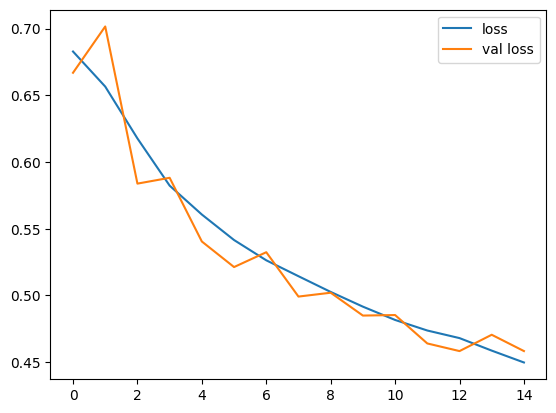

In [20]:
plt.plot(model.history.history['loss'],label="loss")
plt.plot(model.history.history['val_loss'],label="val loss")
plt.legend()

In [21]:
!wget /content/7A68FE16-3F13-40AD-A54B-C2C87194FFC8-scaled.jpeg

/content/7A68FE16-3F13-40AD-A54B-C2C87194FFC8-scaled.jpeg: Scheme missing.


In [26]:
del test_image

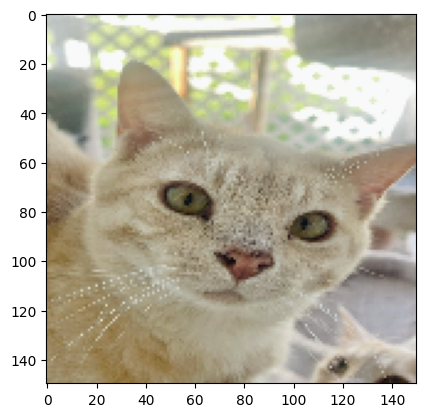

In [27]:
test_image=cv2.imread("/content/7A68FE16-3F13-40AD-A54B-C2C87194FFC8-scaled.jpeg")
test_image=cv2.resize(test_image,(150,150))
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_image)


In [28]:
test_image=test_image/255.0
test_image=np.expand_dims(test_image,axis=0)

In [29]:
model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step


array([[0.680062  , 0.31993803]], dtype=float32)

In [30]:
train_idg.class_indices

{'cat': 0, 'dog': 1}

In [32]:
model.save

<bound method Model.save of <Sequential name=sequential, built=True>>